In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

1. Simple/Polynomial Linear Regression
Run a simple linear regression using the Holdout method (train-test split) on salary data and plot the line plot of predicted vs the values from the test dataset.

Perform a polynomial regression of salary feature with degrees 2,3, and 4 and compare the results.

Which one of the 4 models will you use and why?

In [7]:
dataset = pd.read_csv('Salary_Data.csv')

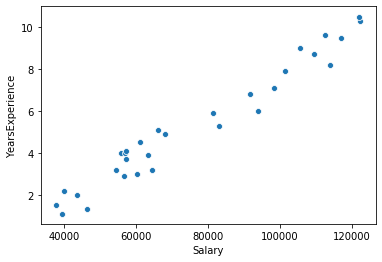

In [8]:
dataset.describe()
sns.scatterplot(x=dataset["Salary"], y=dataset["YearsExperience"])

In [9]:
#sns.regplot()

In [37]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [39]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1, 1))
y_test = sc_y.transform(y_test.reshape(-1, 1))

In [40]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print(lm.intercept_, lm.coef_)

[-1.35363774e-17] [[0.97539879]]


In [42]:
y_pred = lm.predict(X_test)

In [43]:
list1 = sorted(zip(X_test, lm.predict(X_test)))
X_test_sorted,y_test_pred=zip(*list1)

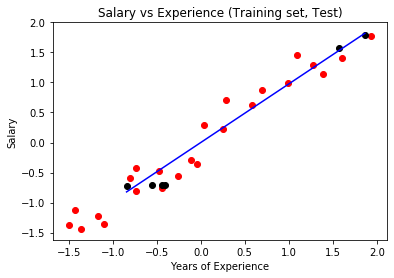

In [44]:
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, y_test, color = 'black')
plt.plot(X_test_sorted, y_test_pred, color = 'blue')
plt.title('Salary vs Experience (Training set, Test)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [45]:
lm.score(X_test,y_test)

0.9720725422361338

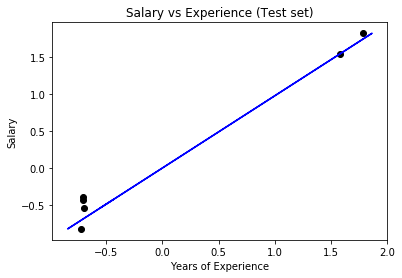

In [46]:
plt.scatter(y_test, y_pred, color = 'black')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
#for d in range(2,6)
polynomial_features= PolynomialFeatures(degree=6)
x_poly_train = polynomial_features.fit_transform(X_train)
x_poly_test = polynomial_features.transform(X_test)


In [50]:
lm2 = LinearRegression(fit_intercept=False)
lm2.fit(x_poly_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [51]:
list2 = sorted(zip(X_test, lm2.predict(x_poly_test)))
X_test_sorted,y_pred_sorted=zip(*list2)

In [52]:
y_poly_pred = lm2.predict(x_poly_test)

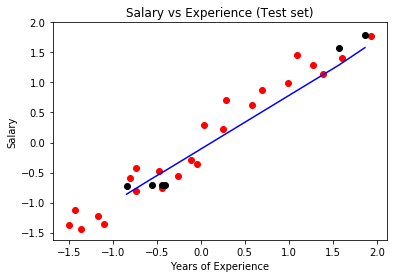

In [53]:
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test,y_test, color = 'black')
plt.plot(X_test_sorted, y_pred_sorted, color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [59]:
from sklearn import metrics
print(lm2.score(x_poly_test, y_test))
print('MAE',metrics.mean_absolute_error(y_test,y_poly_pred))
print('MSE',metrics.mean_squared_error(y_test,y_poly_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_poly_pred)))
print('Explained Var Score',metrics.explained_variance_score(y_test,y_poly_pred))

0.9668219370578014
MAE 0.19652146325862288
MSE 0.04227094586324332
RMSE 0.20559899285561523
Explained Var Score 0.9670043734613066


In [60]:
print(lm.intercept_)

[-1.35363774e-17]


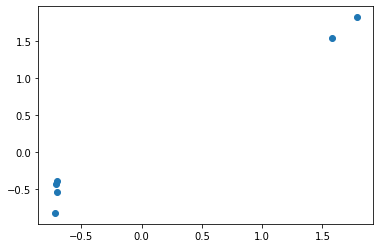

In [61]:
plt.scatter(y_test,y_pred)

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 0.1552650487716458
MSE: 0.03558134353084607
RMSE: 0.18863017661775666


In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, y_poly_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_poly_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_poly_pred)))

MAE: 0.19652146325862288
MSE: 0.04227094586324332
RMSE: 0.20559899285561523


In [64]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9720725422361338

In [65]:
r2_score(y_test, y_poly_pred)

0.9668219370578014

In [66]:
# Predict for 6 years of experience using all the models
# need to reshape into shape (1,1) or will break
print(lm.predict(np.array([6]).reshape(1,1))) #Linear regression
print(lm2.predict(polynomial_features.fit_transform(np.array([6]).reshape(1,1)))) #Poly - Deg 2


[[5.85239272]]
[[3854.77907684]]


In [448]:
LM1 = lm.score(X_test, y_test)
LM4 = lm2.score(x_poly_test, y_test)

models = ['LM1','LM4']
scores = [LM1,LM4]

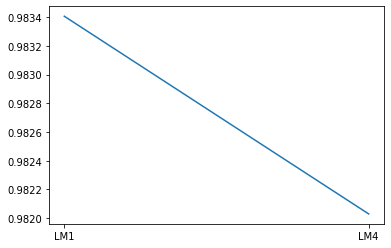

In [449]:
plt.plot(models,scores)

2. Multiple Linear Regression
Part 1: Model Assessment

Run multiple linear regression using the Holdout method on the wine dataset with the goal to predict alcohol level in wine. For this exercise hold 10% of the data as your test set.

Perform a k-Fold cross-validation on the whole dataset with k = 10. Repeat this procedure n times (e.g. 50 times).

You can use the function cross_val_score from sklearn. The function takes as an argument the desired scoring metric (RTFM). For the linear regression use R2. Save the cross-validation scores from all n * k runs and plot their distribution. Would you expect that the Holdout score is within the range of cross-validation scores? Why?

Repeat the above procedure with different scoring metrics for the linear regression, e.g. rmse.

In [222]:
wine = pd.read_csv('winequality-white.csv', sep =";")

In [245]:
X1 = wine.drop(['alcohol'], axis =1)
y1 = wine['alcohol']

In [246]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.1, random_state = 100)

In [247]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import KFold

In [358]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [370]:
X1 = scaler.fit_transform(X1)

In [369]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, y1, test_size=0.10)
model = LinearRegression()
model.fit(X1_train, Y1_train)
result = model.score(X1_test, Y1_test)
result

0.9024770019506306

In [371]:
predictions1 = model.predict(X1_test)

In [362]:
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 89.27%


In [363]:
score = []
for i in range(0,50):
    kfold = KFold(n_splits=10, shuffle= True)
    model_kfold = LinearRegression()
    results_kfold = cross_val_score(model_kfold, X1, y1, cv=kfold)
    score.append(results_kfold)

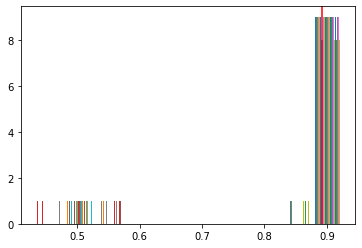

In [364]:
plt.hist(score)
plt.axvline(result,c="red")

In [452]:
model_rmse = np.sqrt(metrics.mean_squared_error(Y1_test,predictions1))
model_rmse

0.36906015055004976

In [451]:
df_coeff = pd.DataFrame({'Feature':wine.columns.values[0:11], 'Coefficients': model.coef_})
df_coeff

,Feature,Coefficients
0,fixed acidity,5.328866
1,volatile acidity,1.022534
2,citric acid,0.620932
3,residual sugar,15.231628
4,chlorides,-0.045710
5,free sulfur dioxide,-1.024784
6,total sulfur dioxide,0.217434
7,density,-35.033778
8,pH,2.648952
9,sulphates,0.822181


In [ ]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_poly_pred)))

In [312]:
print(np.mean(scores))

0.6538721472500965


In [367]:
model.coef_

array([  5.17860421,   1.0193207 ,   0.605539  ,  14.99316576,
        -0.13608951,  -0.96422369,   0.17486069, -34.67750139,
         2.60923181,   0.78517262,   0.46273949])

In [368]:
wine.columns.values


array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

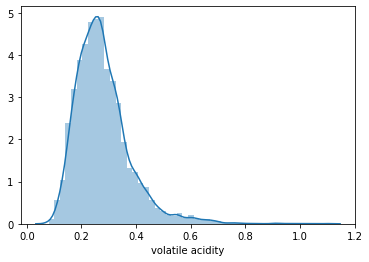

In [453]:
sns.distplot(wine['volatile acidity'])


In [454]:
wine_log = wine

In [455]:
wine_log['volatile acidity'] = np.log(wine_log['volatile acidity'])

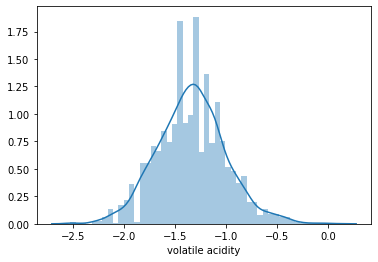

In [456]:
sns.distplot(wine_log['volatile acidity'])

In [458]:
X = wine_log.drop(columns = 'alcohol')
y = wine_log['alcohol']

In [459]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)

In [461]:
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

In [464]:
pipeline= Pipeline(memory=None,
         steps=[('data_scaling',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [466]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('data_scaling',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [467]:
model_log_score = pipeline.score(X_test, y_test)
model_log_score

0.8890792316300494

In [472]:
predict = pipeline.predict(X_test)


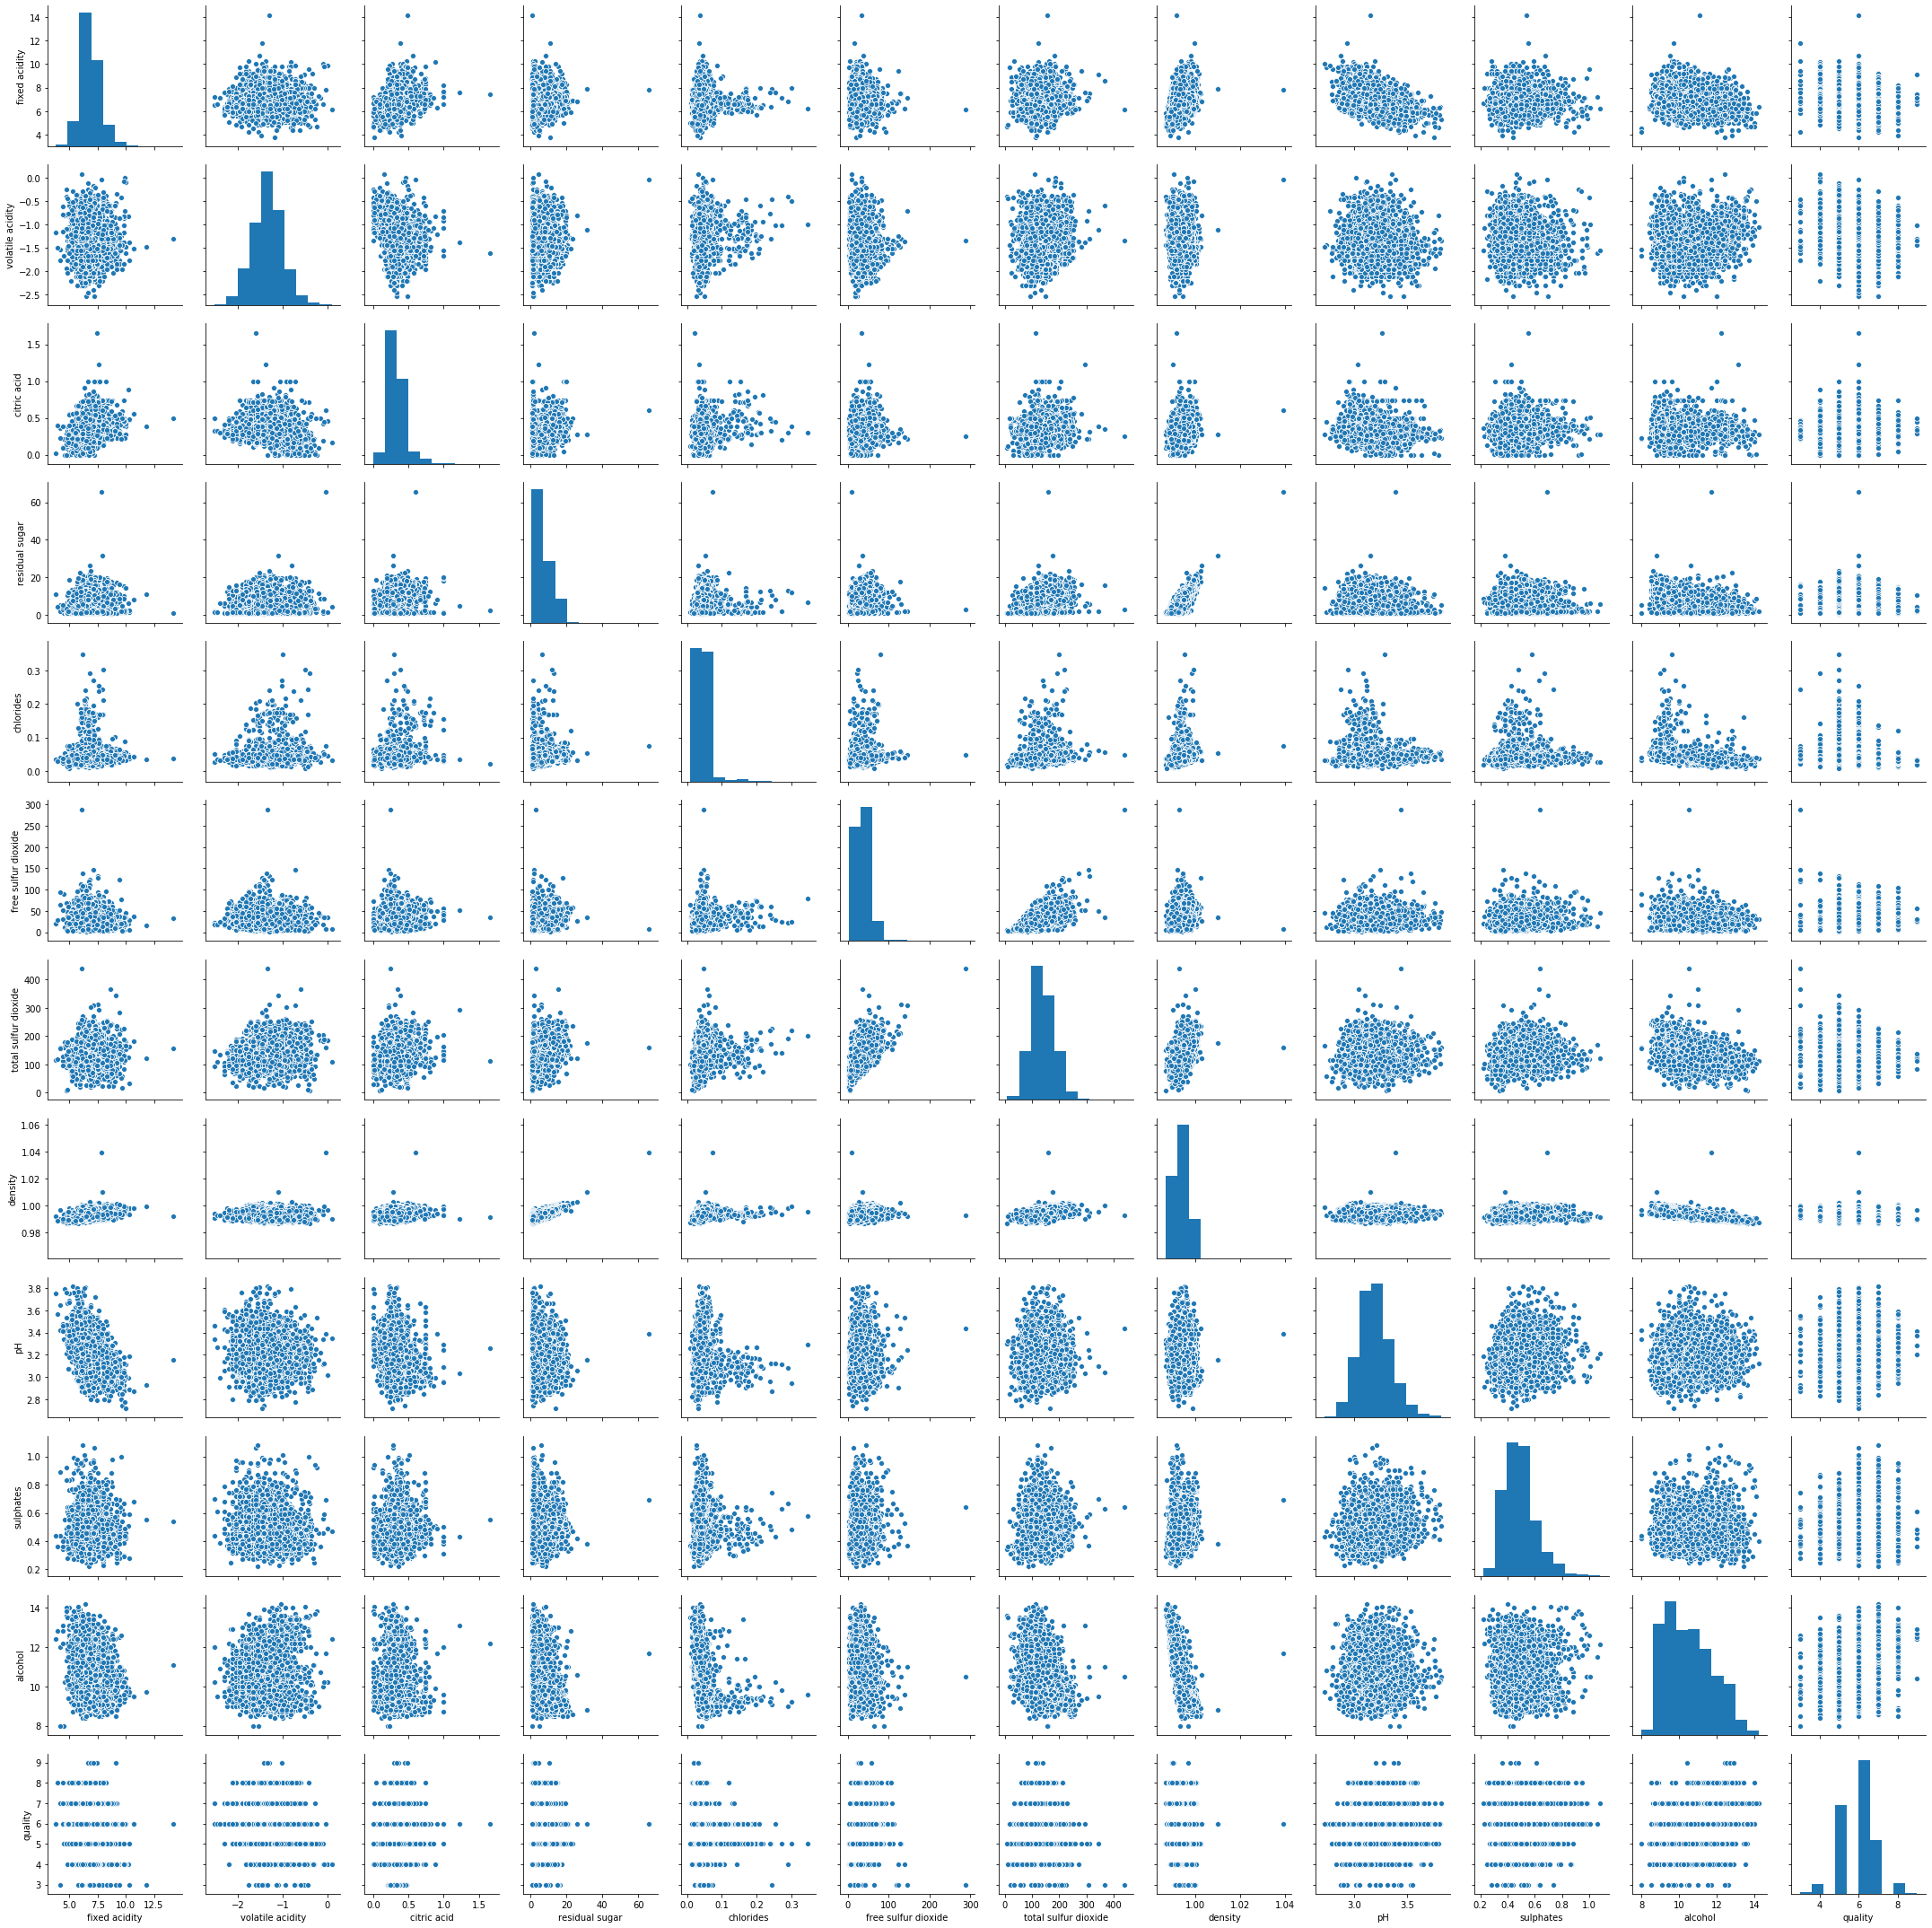

In [473]:
m = sns.pairplot(wine)
m

In [487]:
X1 = wine.drop(['alcohol'], axis =1)
Y1 = wine['alcohol']

In [493]:
scores1 = []
kf.get_n_splits(X1)
kf = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in kf.split(X1):
    X_train, X_test, y_train, y_test = X1[train_index], X1[test_index], Y1[train_index], Y1[test_index]
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    model = LinearRegression()
    scores1.append(model.score(X_test, y_test))

KeyError: "None of [Int64Index([ 490,  491,  492,  493,  494,  495,  496,  497,  498,  499,\n            ...\n            4888, 4889, 4890, 4891, 4892, 4893, 4894, 4895, 4896, 4897],\n           dtype='int64', length=4408)] are in the [columns]"

In [499]:
Y1[test_index]

0       8.8
1       9.5
2      10.1
3       9.9
4       9.9
5      10.1
6       9.6
7       8.8
8       9.5
9      11.0
10     12.0
11      9.7
12     10.8
13     12.4
14      9.7
15     11.4
16      9.6
17     12.8
18     11.3
19      9.5
20     12.8
21     11.0
22     10.5
23      9.3
24     10.0
25     10.4
26     10.0
27     10.5
28     11.6
29     12.3
       ... 
460     9.5
461     9.3
462     9.5
463     9.4
464     8.7
465     8.9
466     9.4
467     9.4
468     8.7
469     9.6
470     9.3
471    10.0
472    12.5
473     9.6
474     9.4
475     9.5
476    12.4
477    10.5
478     9.2
479    10.4
480     9.2
481    10.6
482     9.5
483     9.2
484     9.6
485     9.7
486     9.7
487    10.7
488    10.5
489     8.9
Name: alcohol, Length: 490, dtype: float64